In [1]:
import pandas as pd
import numpy as np

import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds


%matplotlib inline  

In [2]:
b1 = tsds.load_ozone()
df = b1.mPastData

     Month  Ozone       Time
0  1955-01    2.7 1955-01-01
1  1955-02    2.0 1955-02-01
2  1955-03    3.6 1955-03-01
3  1955-04    5.0 1955-04-01
4  1955-05    6.5 1955-05-01


In [3]:
b1.mHorizon

12

In [4]:

lEngine = autof.cForecastEngine()


INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signals': ['Ozone'], 'Horizons': {'Ozone': 12}}))
INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Ozone'], 'Transformations': [('Ozone', 'None', '_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone', 'None', 'RelDiff_', 'T+S+R'), ('Ozone', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Transformation': 'RelDiff_Ozone', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Transformation': 'Diff_Ozone', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Transformation': 'CumSum_Ozone', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Transformation': '_Ozone', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.677, ('TRAINING', {'Signal': 'Ozone', 'Transformatio

  Transformation DecompositionType  \
1         _Ozone             T+S+R   
0     Diff_Ozone             T+S+R   

                                               Model    Voting Complexity  
1  _Ozone_LinearTrend_residue_Seasonal_MonthOfYea...  612.5000      SSSSS  
0  Diff_Ozone_ConstantTrend_residue_Seasonal_Mont...  617.1667      LMSSS  


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.381, ('UPDATE_BEST_MODEL_PERFS', {'Signal': 'Ozone', 'Model': '_Ozone_LinearTrend_residue_Seasonal_MonthOfYear_residue_NoAR'}))
INFO:pyaf.timing:('OPERATION_START', ('COMPUTE_PREDICTION_INTERVALS', {'Signal': 'Ozone'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.37, ('COMPUTE_PREDICTION_INTERVALS', {'Signal': 'Ozone'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.817, ('FINALIZE_TRAINING', {'Signals': ['Ozone'], 'Transformations': [('Ozone', [('Ozone', 'None', 'CumSum_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone', 'None', 'RelDiff_', 'T+S+R'), ('Ozone', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 6.978, ('TRAINING', {'Signals': ['Ozone'], 'Horizons': {'Ozone': 12}}))
INFO:pyaf.std:TIME_DETAIL TimeVariable='Time' TimeMin=1955-01-01T00:00:00.000000 TimeMax=1967-09-01T00:00:00.000000 TimeDelta=<DateOffset: months=1> Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Ozone' Length=2

  Split Transformation DecompositionType  \
0  None     Diff_Ozone             T+S+R   
1  None         _Ozone             T+S+R   
2  None         _Ozone             T+S+R   
3  None         _Ozone             T+S+R   
4  None         _Ozone             T+S+R   

                                               Model  \
0  Diff_Ozone_ConstantTrend_residue_Seasonal_Mont...   
1  _Ozone_LinearTrend_residue_Seasonal_MonthOfYea...   
2  _Ozone_LinearTrend_residue_Seasonal_MonthOfYea...   
3  _Ozone_PolyTrend_residue_Seasonal_MonthOfYear_...   
4  _Ozone_PolyTrend_residue_Seasonal_MonthOfYear_...   

                                     DetailedFormula  \
0  (Diff_Ozone, T+S+R, None, Diff_Ozone_ConstantT...   
1  (_Ozone, T+S+R, None, _Ozone_LinearTrend_resid...   
2  (_Ozone, T+S+R, None, _Ozone_LinearTrend_resid...   
3  (_Ozone, T+S+R, None, _Ozone_PolyTrend_residue...   
4  (_Ozone, T+S+R, None, _Ozone_PolyTrend_residue...   

                                           Category Complexit

INFO:pyaf.timing:('OPERATION_END_ELAPSED', 1.345, ('PLOTTING', {'Signals': ['Ozone']}))


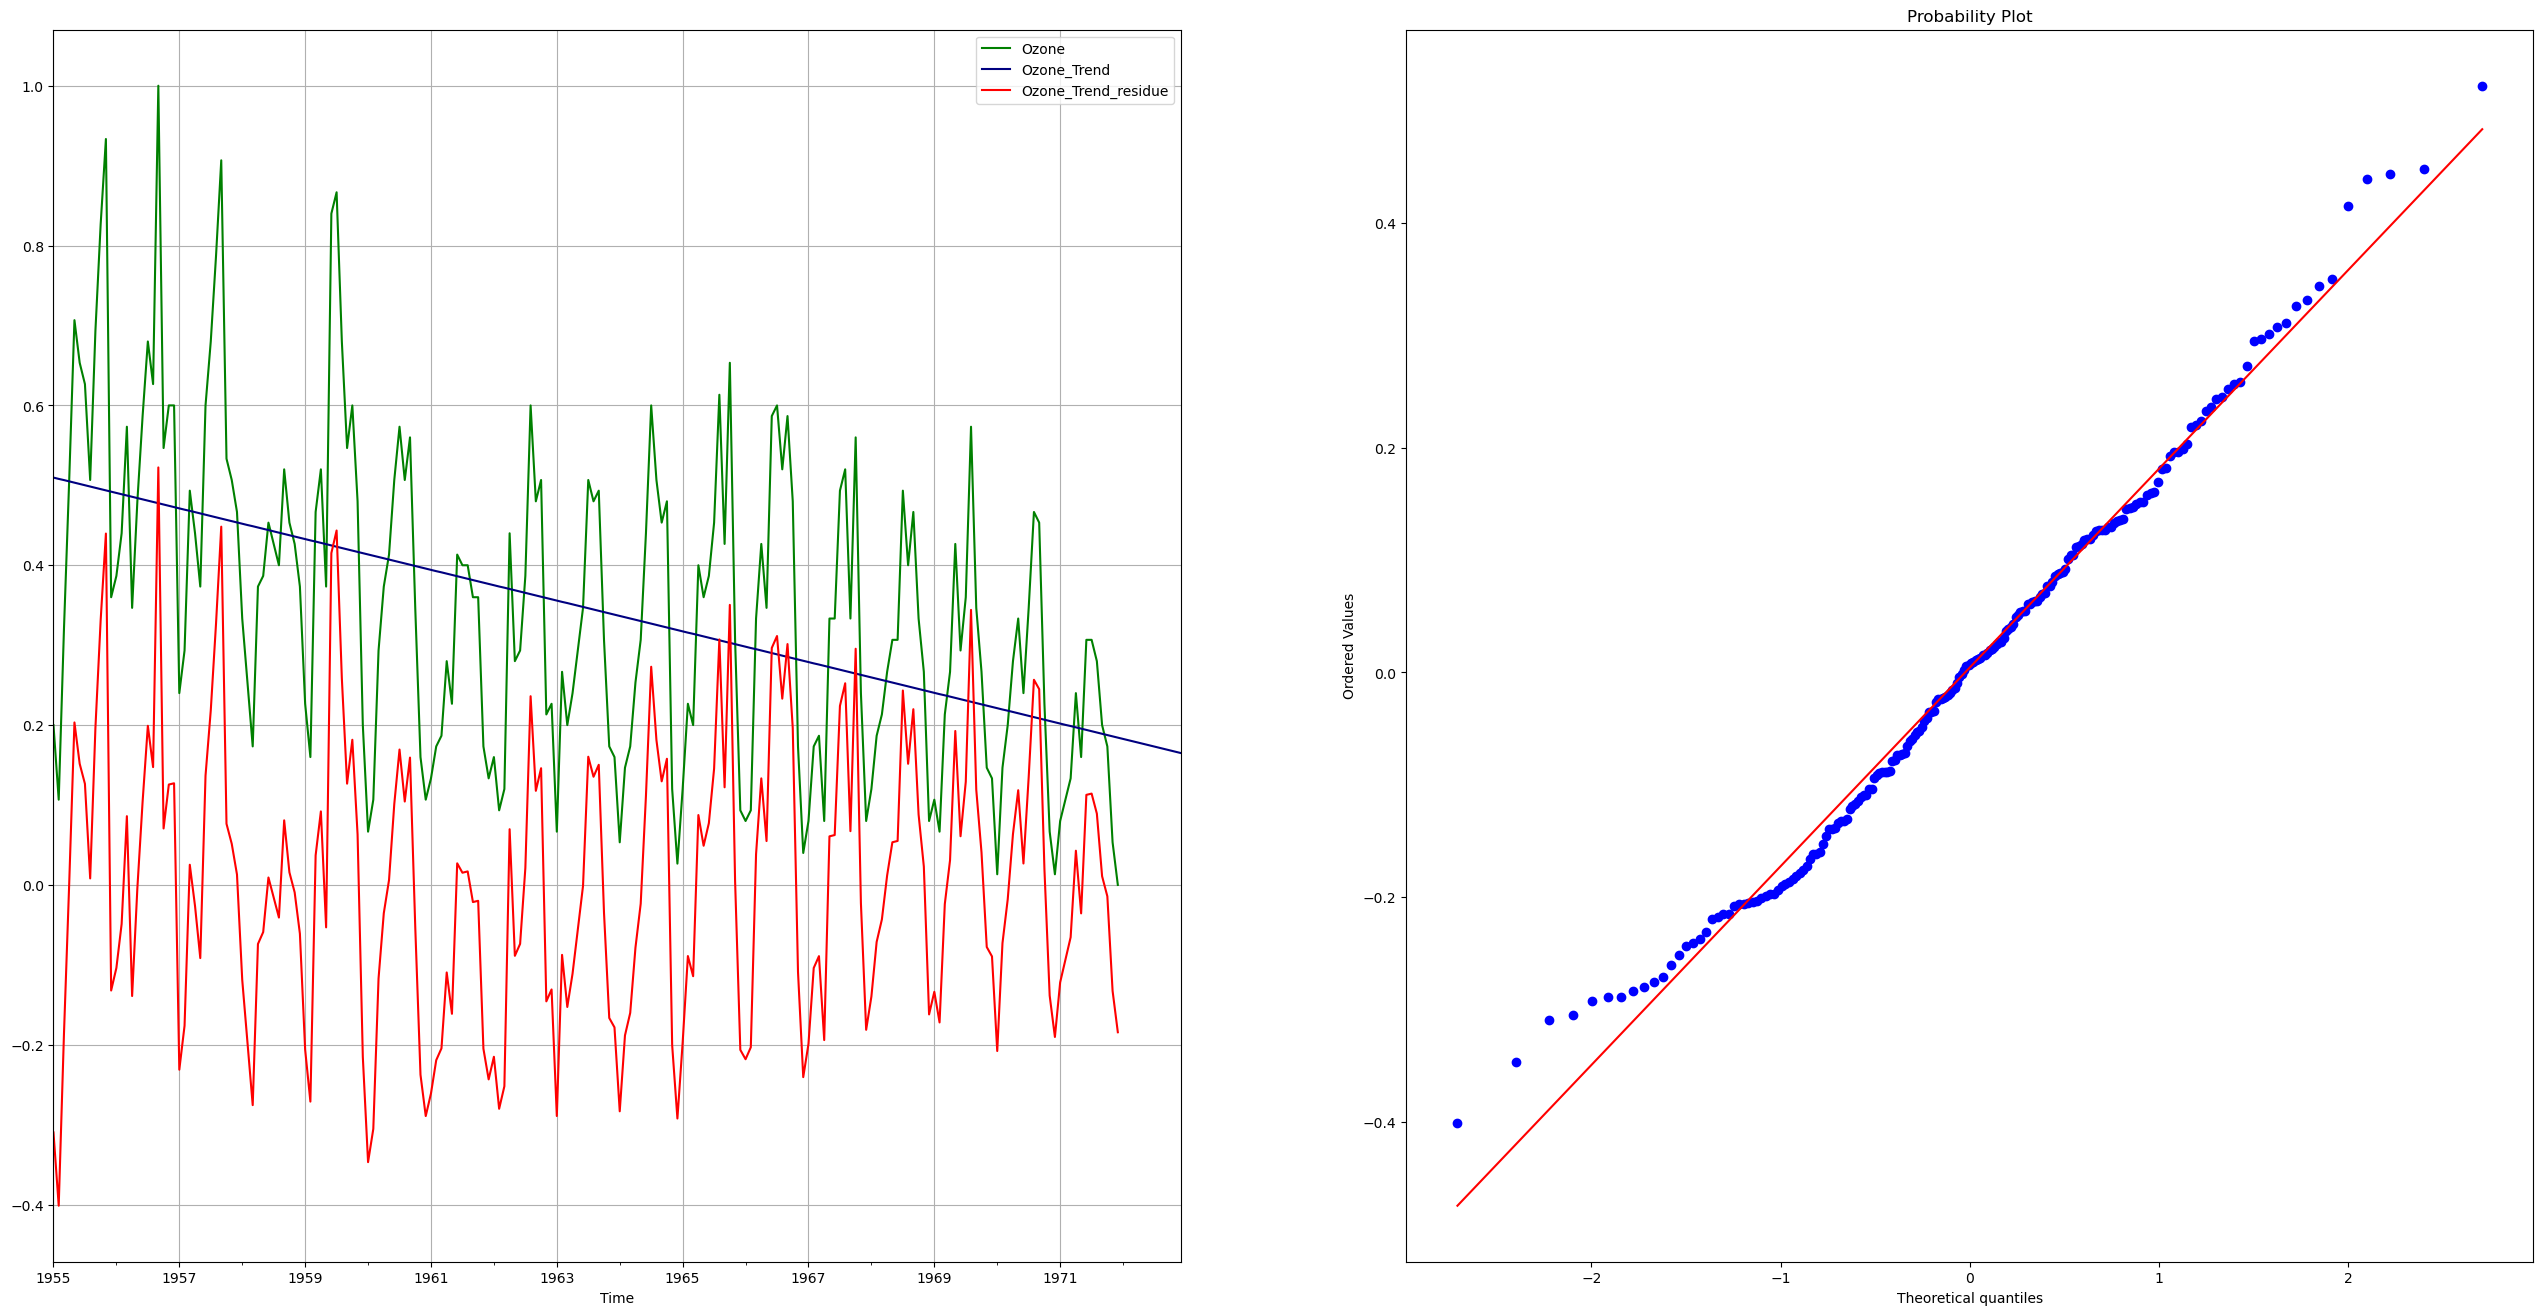

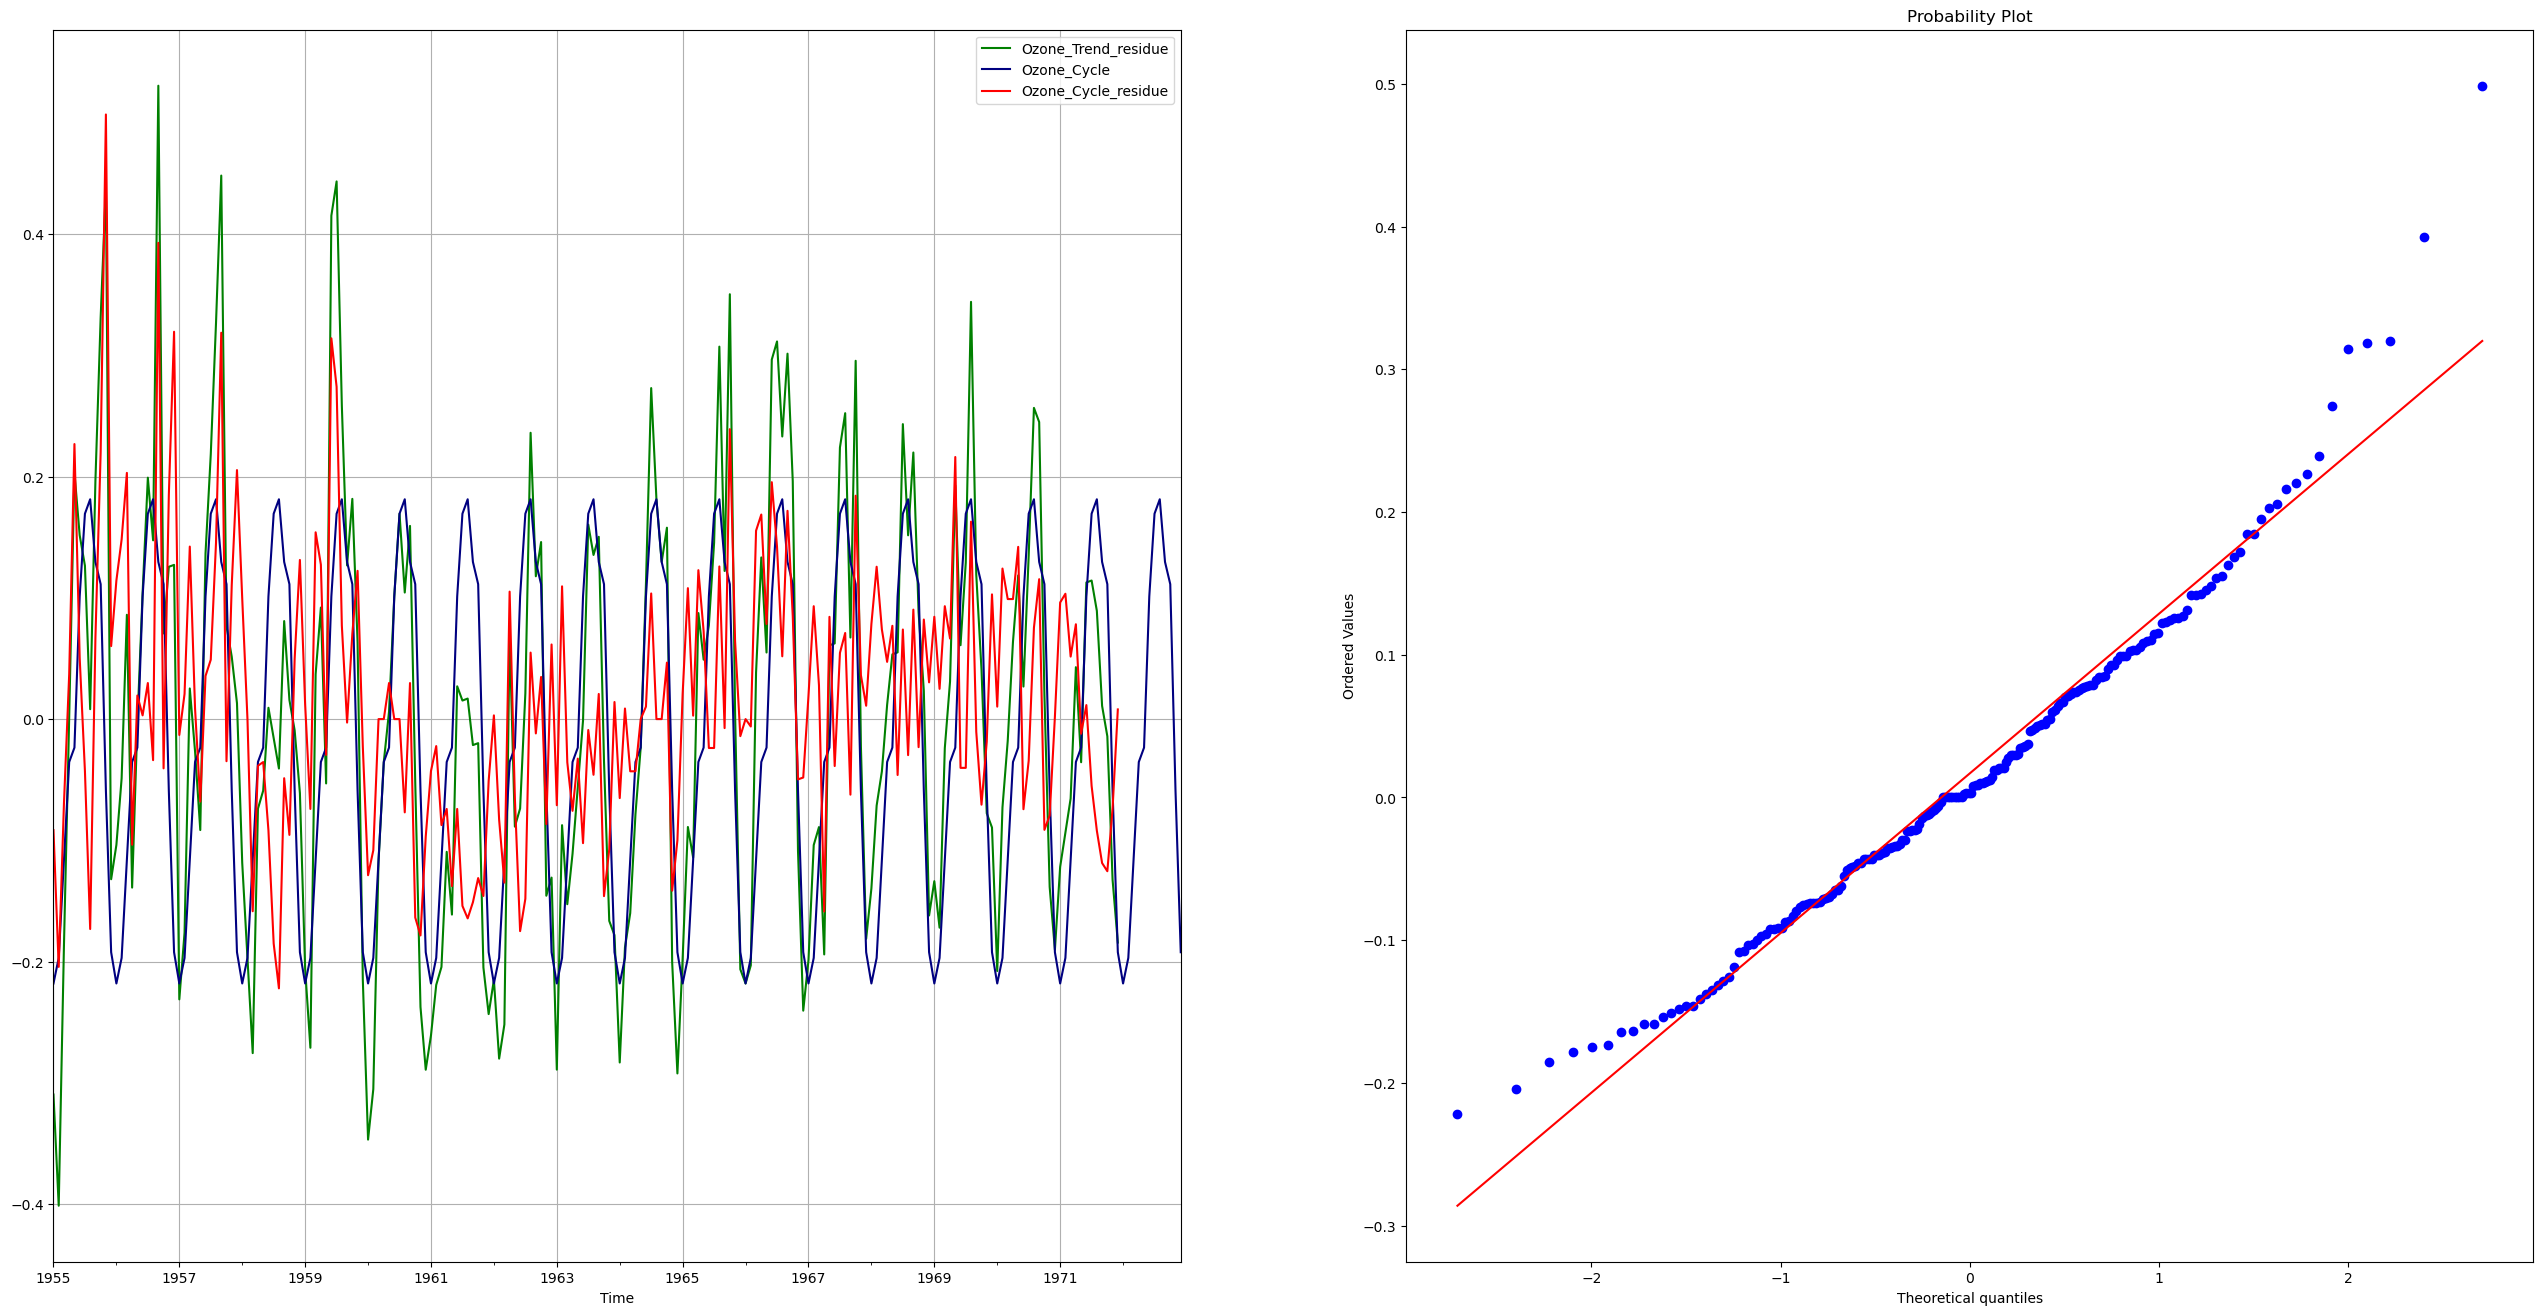

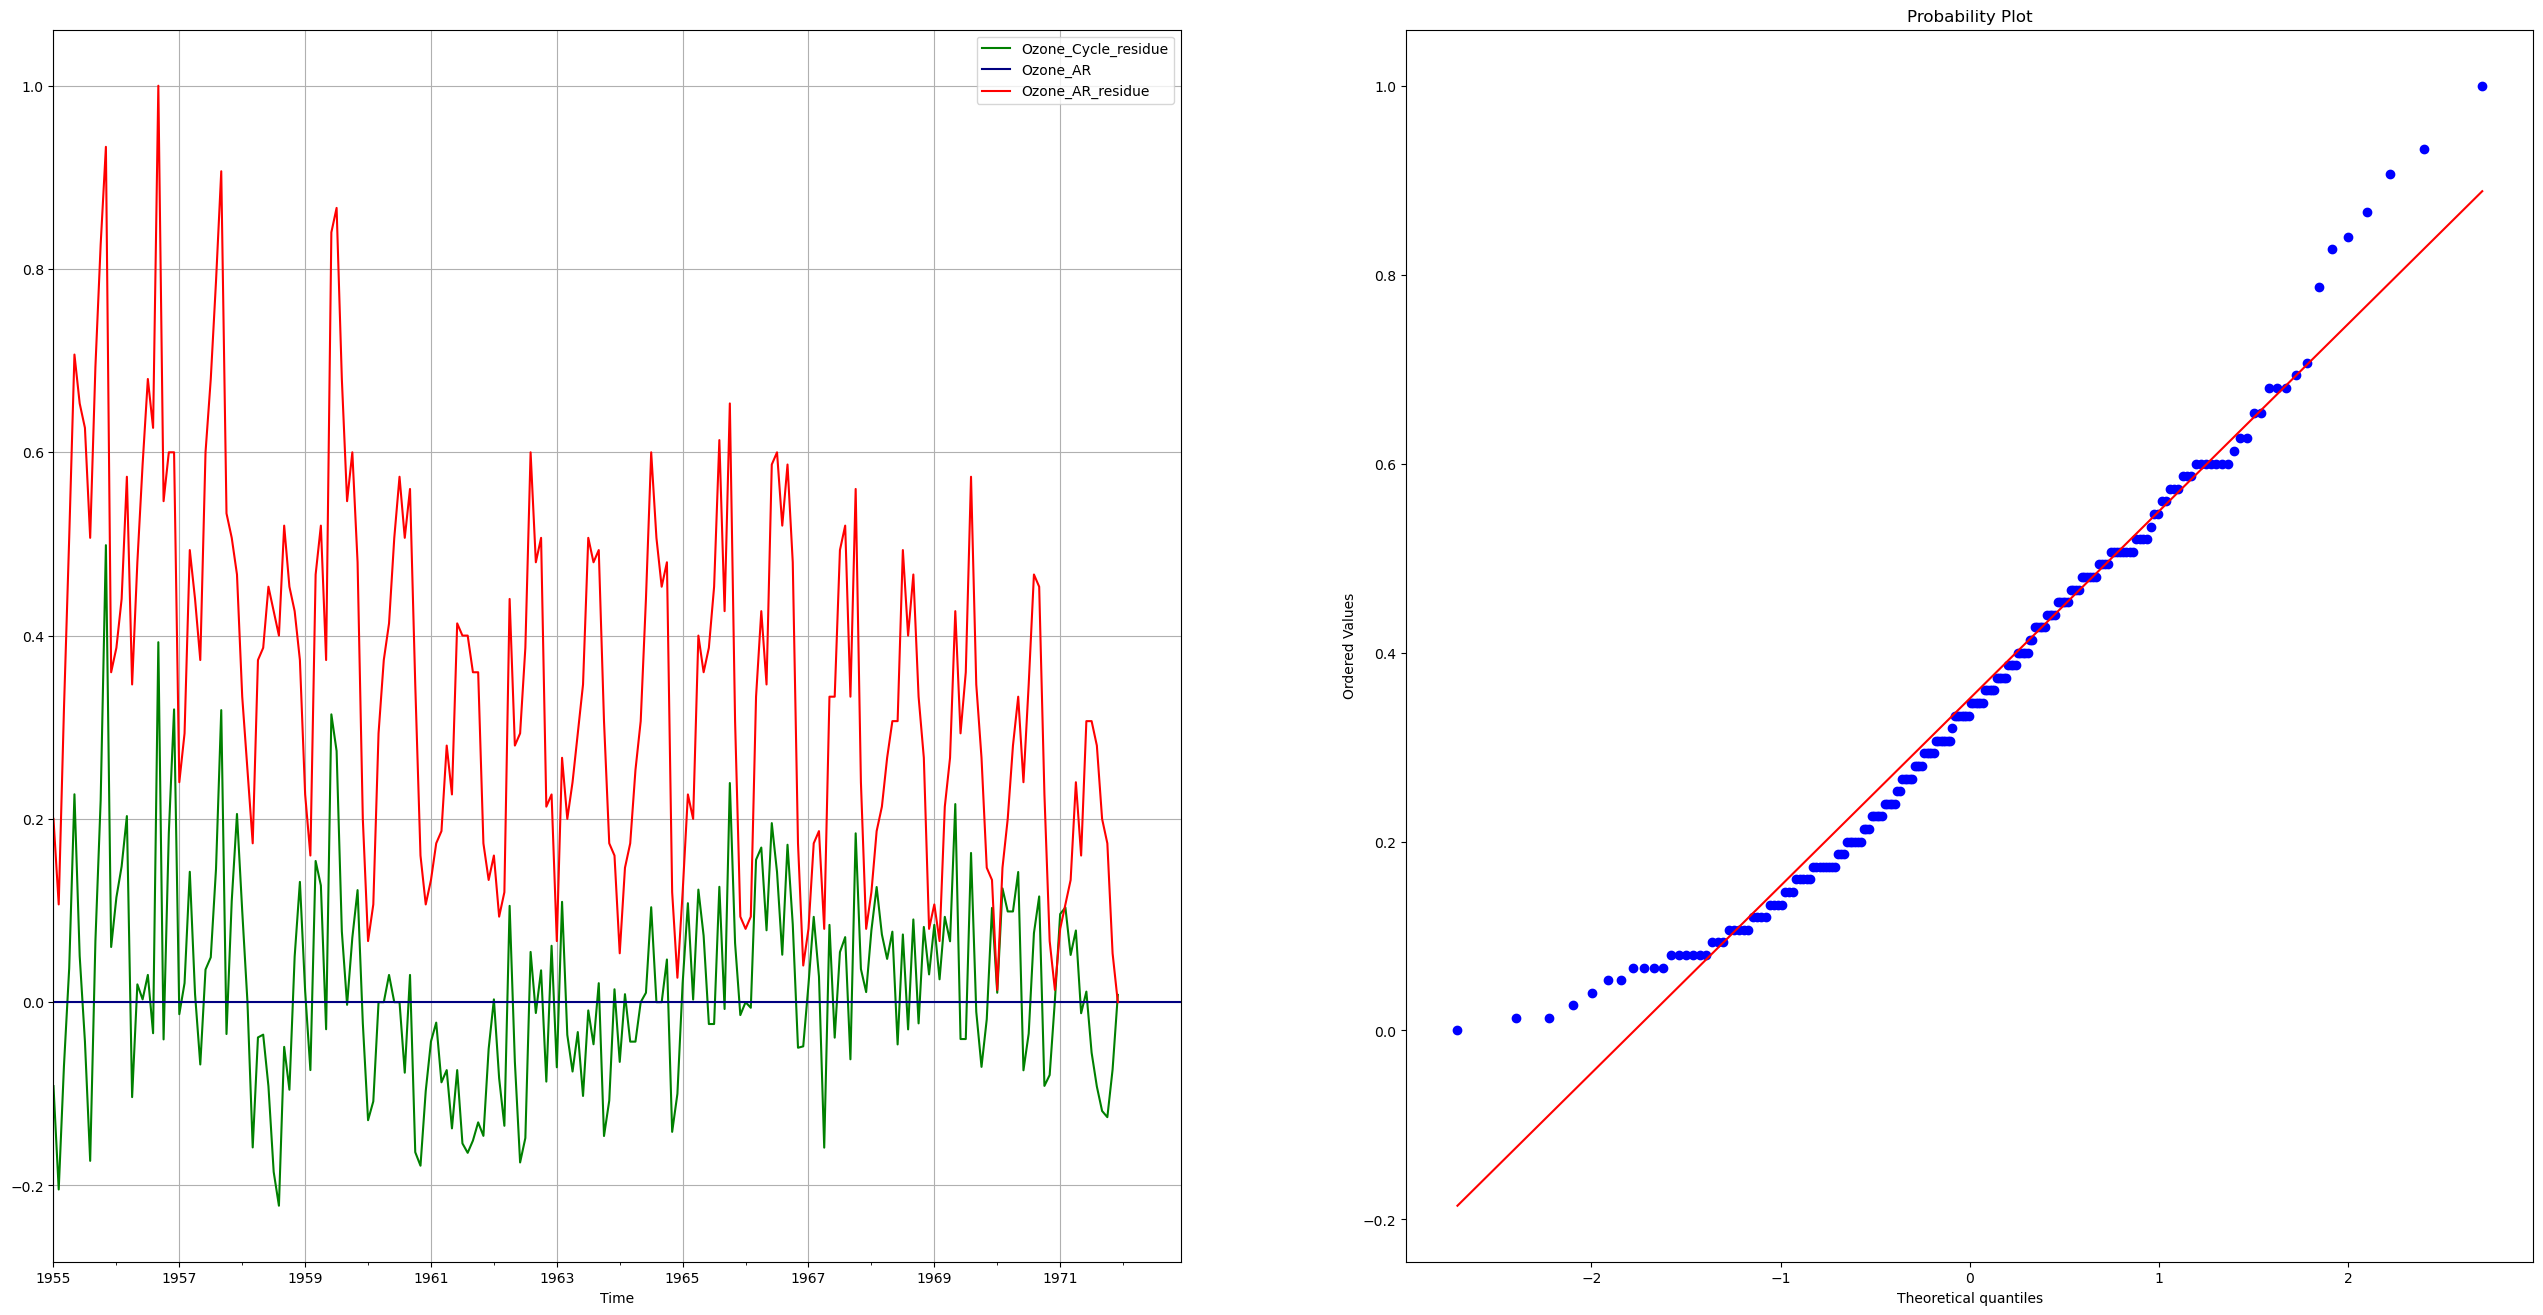

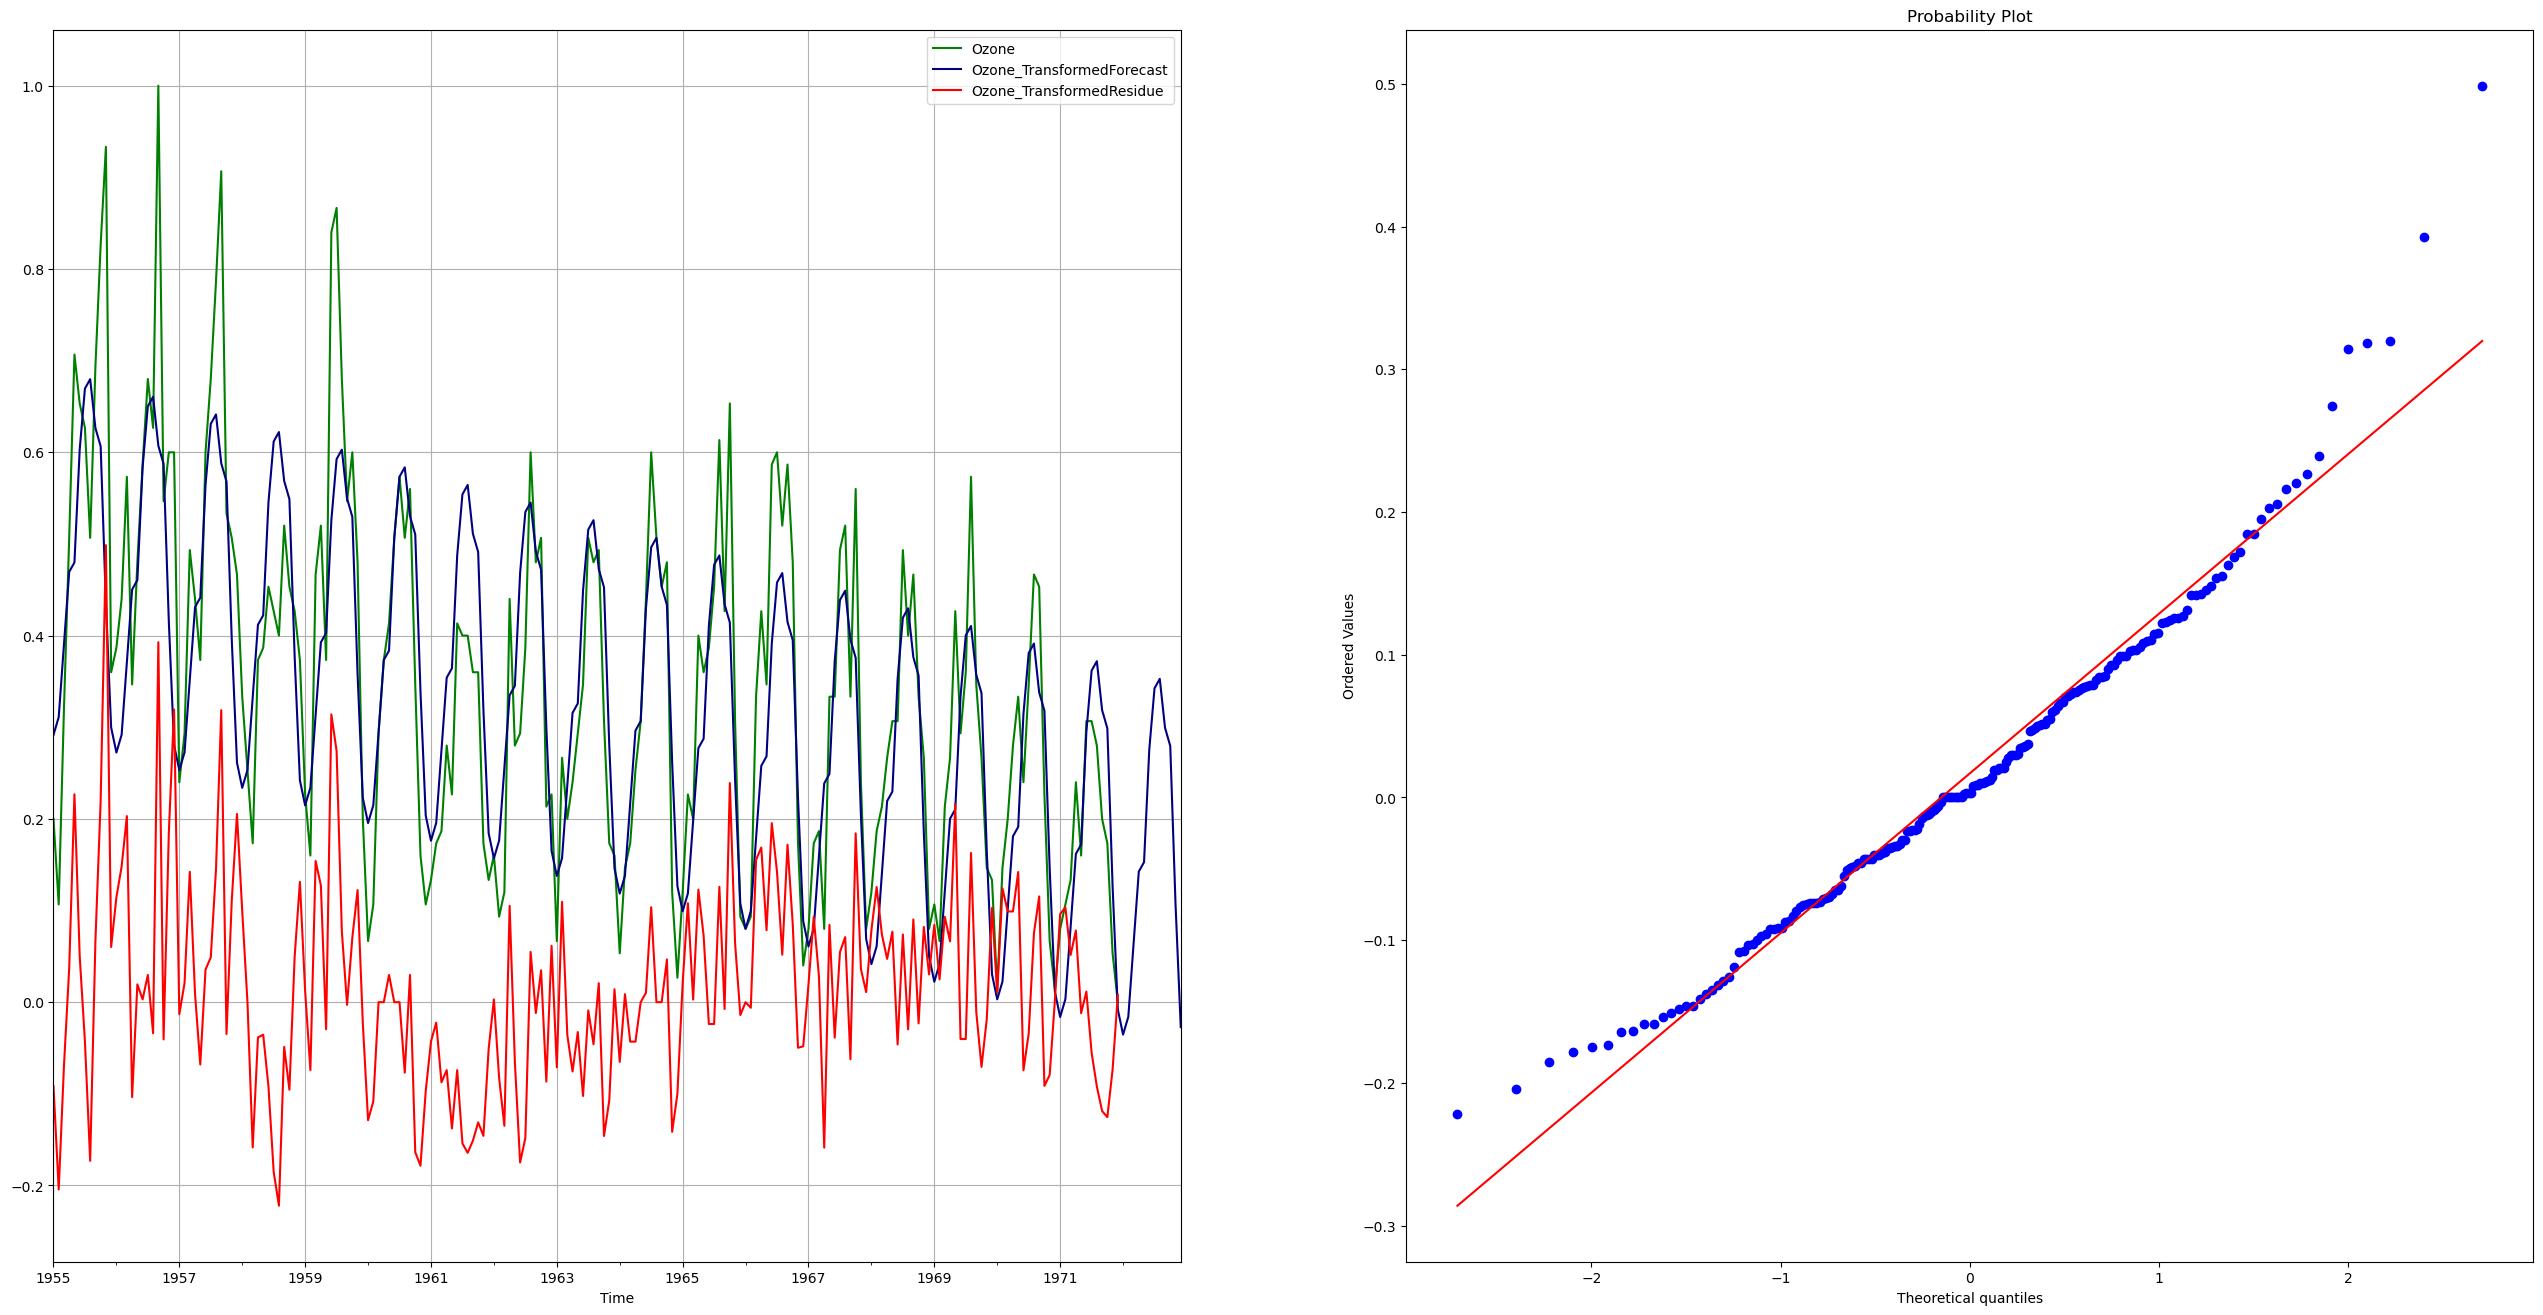

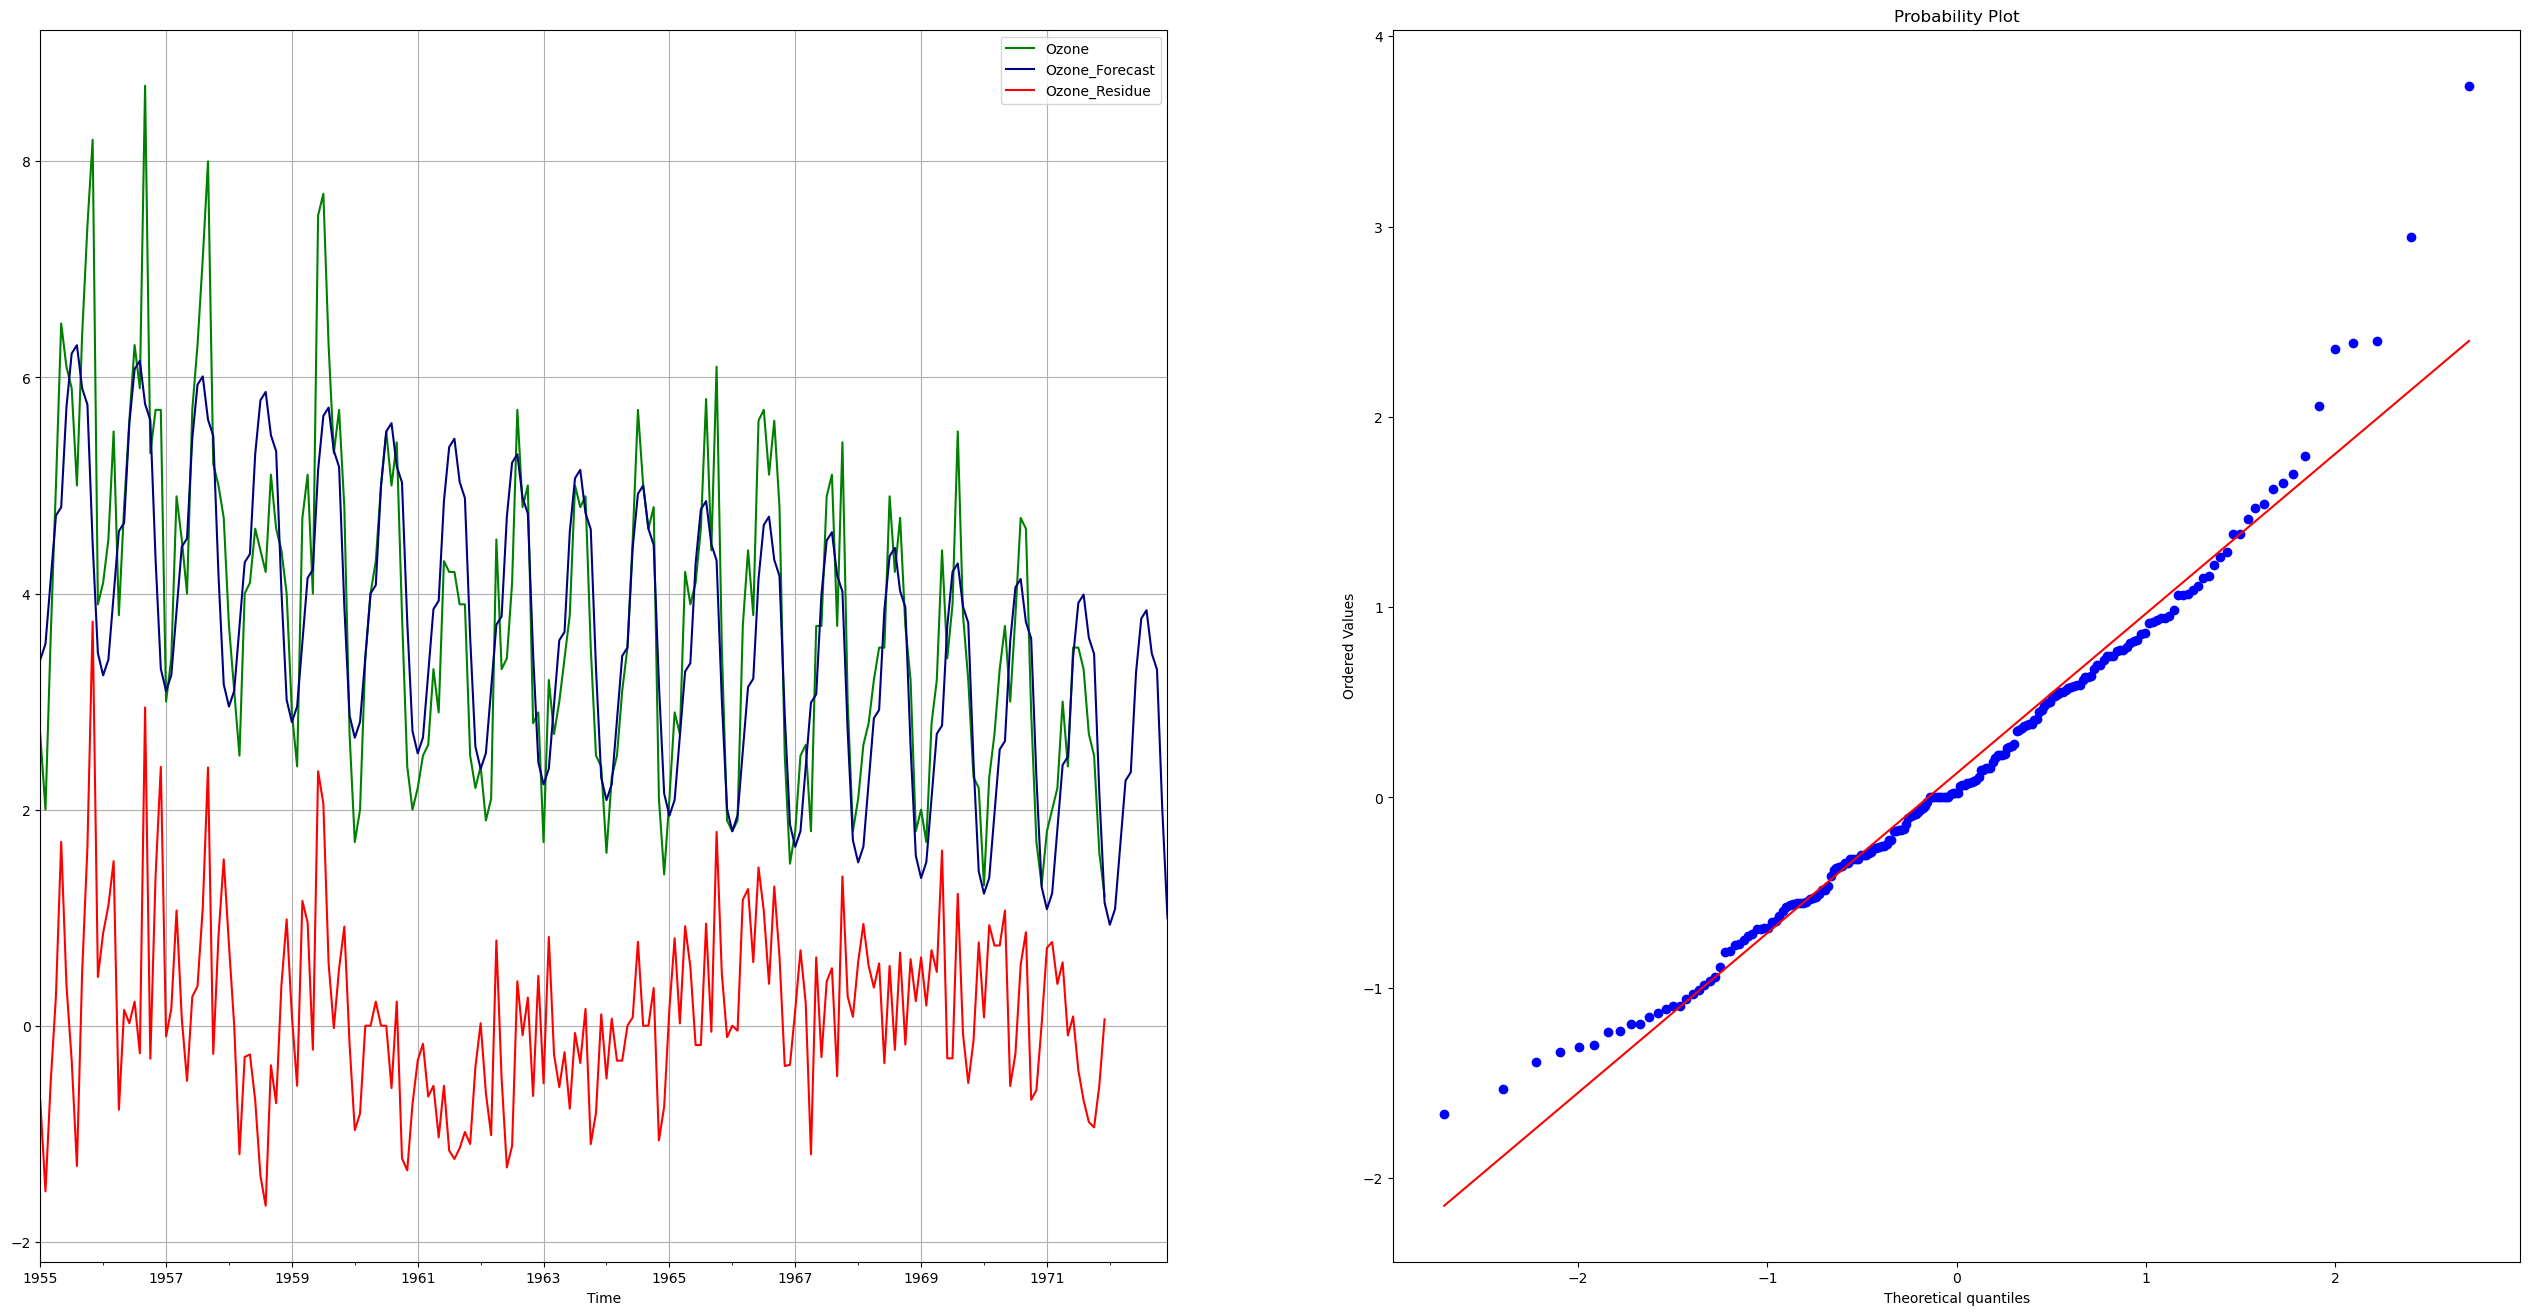

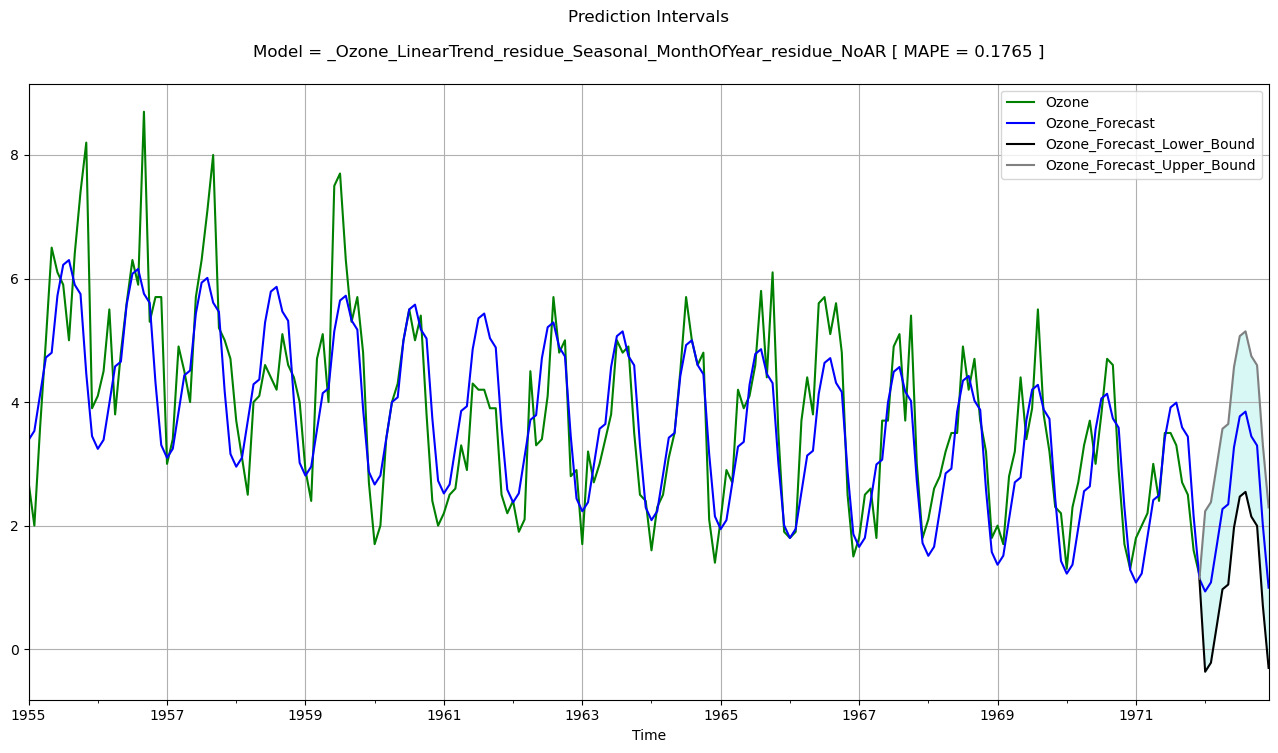

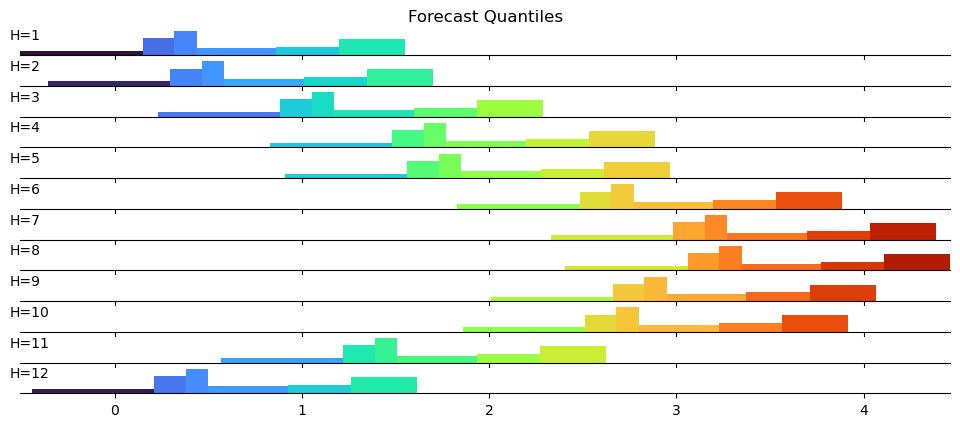

In [5]:
lEngine.mOptions.mModelSelection_Criterion = 'MAPE'
lEngine.train(df , b1.mTimeVar , b1.mSignalVar, b1.mHorizon);
lEngine.getModelInfo();
print(lEngine.mSignalDecomposition.mTrPerfDetails.head());
lEngine.standardPlots()

In [6]:
dfapp_in = df.copy();
dfapp_in.tail()

#H = 12
dfapp_out = lEngine.forecast(dfapp_in, b1.mHorizon);
#dfapp_out.to_csv("outputs/ozone_apply_out.csv")
dfapp_out.tail(2 * b1.mHorizon)


INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Ozone'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.216, ('FORECASTING', {'Signals': ['Ozone'], 'Horizon': 12}))


,Time,Ozone,row_number,Time_Normalized,_Ozone,_Ozone_LinearTrend,_Ozone_LinearTrend_residue,_Ozone_LinearTrend_residue_Seasonal_MonthOfYear,_Ozone_LinearTrend_residue_Seasonal_MonthOfYear_residue,_Ozone_LinearTrend_residue_Seasonal_MonthOfYear_residue_NoAR,...,Ozone_Residue,Ozone_Forecast_Lower_Bound,Ozone_Forecast_Upper_Bound,Ozone_Forecast_Quantile_2,Ozone_Forecast_Quantile_18,Ozone_Forecast_Quantile_34,Ozone_Forecast_Quantile_50,Ozone_Forecast_Quantile_66,Ozone_Forecast_Quantile_82,Ozone_Forecast_Quantile_98
192,1971-01-01,1.8,192,1.263294,0.080000,0.201917,-0.121917,-0.218079,0.096162,0.0,...,0.721214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,1971-02-01,2.0,193,1.269996,0.106667,0.200284,-0.093618,-0.196993,0.103375,0.0,...,0.775316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,1971-03-01,2.2,194,1.276048,0.133333,0.198810,-0.065476,-0.117022,0.051546,0.0,...,0.386593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,1971-04-01,3.0,195,1.282750,0.240000,0.197177,0.042823,-0.035390,0.078212,0.0,...,0.586593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,1971-05-01,2.4,196,1.289235,0.160000,0.195597,-0.035597,-0.023536,-0.012061,0.0,...,-0.090458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,1971-06-01,3.5,197,1.295936,0.306667,0.193965,0.112702,0.101156,0.011546,0.0,...,0.086593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,1971-07-01,3.5,198,1.302421,0.306667,0.192385,0.114282,0.169403,-0.055121,0.0,...,-0.413407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,1971-08-01,3.3,199,1.309122,0.280000,0.190752,0.089248,0.181309,-0.092061,0.0,...,-0.690458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1971-09-01,2.7,200,1.315824,0.200000,0.189120,0.010880,0.129608,-0.118728,0.0,...,-0.890458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,1971-10-01,2.5,201,1.322309,0.173333,0.187540,-0.014207,0.111277,-0.125484,0.0,...,-0.941128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
